**Final Project Data 604 - Simulations**
*Marjete Vucinaj*

Simulation Project: 
Write a process simulation that includes waiting time (discrete event simulation).  You may use any topic of interest to you.  Write the simulation and all of the following in Jupyter.
Each element is worth 5 points and will be graded using the rubric shown here.

Introduction 
- Simulation can help predict, or better explain the impact of changes within a system, such as how adjusting staffing levels might influence outcomes.
- Discrete event simulation (DES) is a sequence of events in time which influences the state of the system. 
- The Goal of this project is to use DES to assess how quickly customers can pick up their medication at the pharmacy. 


1. State the problem and its significance
Problem: After visiting a health provider, many folks might be perscribed medication, then when they visit their local pharmacist to collect their medication, they are faced with unusually long wait times. 

Significance: Customer satisfaction and their overall experience is poor especially when they may be unwell or in urgent need of their medication. This might even result in financial losses for the pharmacy if dissatisfied customers choose to switch to competing pharmacies and if their repuatation diminishes. More importantly, obtaining medication in a timely manner is a key indicater with how compliant a patient is to adhereing to their medication, so if the customer were to be impatient and leave the line without their medication this would result in harm to their health. 

2. Provide a flow-chart model

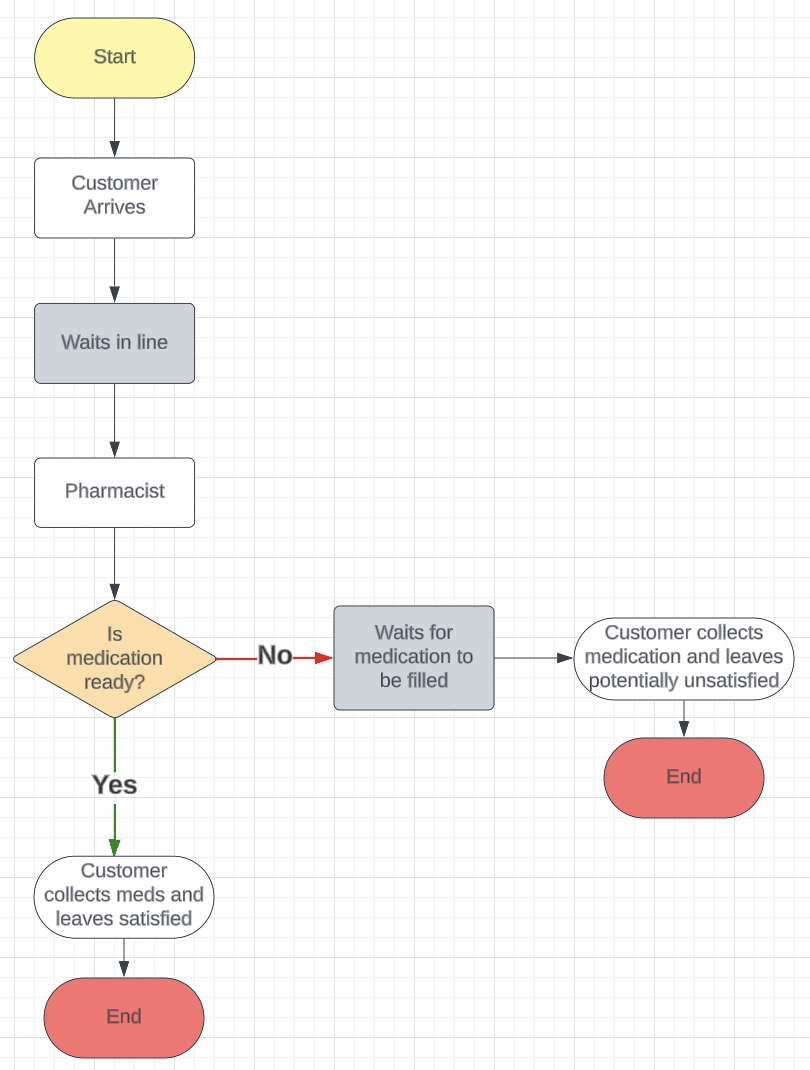

In [2]:
from IPython.display import Image
Image(filename='flowchart.png')


*Simulation* 

In [23]:
import simpy
import random
import matplotlib.pyplot as plt
import statistics

class Pharmacy:
    def __init__(self, env, num_pharmacists):
        self.env = env
        self.pharmacists = simpy.Resource(env, num_pharmacists)
        self.waiting_times_ready = []
        self.waiting_times_fill = []

    def pick_up_medication(self, customer):
        if customer.ready:
            yield self.env.timeout(random.uniform(0, 10))  # Time to fill the medication
        else:
            yield self.env.timeout(random.uniform(20, 30))  # Longer time to fill the medication

    def record_waiting_time(self, start_time, ready):
        waiting_time = self.env.now - start_time
        if ready:
            self.waiting_times_ready.append(waiting_time)
        else:
            self.waiting_times_fill.append(waiting_time)

class Customer:
    def __init__(self, env, pharmacy):
        self.env = env
        self.pharmacy = pharmacy
        self.ready = random.random() < 0.7  # 70% chance that medication is ready

    def process(self):
        arrival_time = self.env.now
        with self.pharmacy.pharmacists.request() as request:
            yield request
            yield self.env.process(self.pharmacy.pick_up_medication(self))
            self.pharmacy.record_waiting_time(arrival_time, self.ready)

def generate_customers(env, num_customers, pharmacy):
    for i in range(num_customers):
        customer = Customer(env, pharmacy)
        env.process(customer.process())
        yield env.timeout(random.expovariate(1/10))  # Inter-arrival time, assuming an average of 10 minutes

def run_simulation(env, num_customers, num_pharmacists, num_simulations):
    waiting_times_ready_avg = []
    waiting_times_fill_avg = []
    for _ in range(num_simulations):
        pharmacy = Pharmacy(env, num_pharmacists)
        env.process(generate_customers(env, num_customers, pharmacy))
        env.run()
        waiting_times_ready_avg.append(statistics.mean(pharmacy.waiting_times_ready))
        waiting_times_fill_avg.append(statistics.mean(pharmacy.waiting_times_fill))
    return waiting_times_ready_avg, waiting_times_fill_avg

num_customers = 30
num_simulations = 20
num_pharmacists_list = [1, 2, 3]

class Pharmacy:
    def __init__(self, env, num_pharmacists):
        self.env = env
        self.pharmacists = simpy.Resource(env, num_pharmacists)
        self.waiting_times = []

    def pick_up_medication(self, customer):
        yield self.env.timeout(random.uniform(0, 10))  # Time to fill the medication

    def record_waiting_time(self, start_time):
        waiting_time = self.env.now - start_time
        self.waiting_times.append(waiting_time)

def customer(env, pharmacy):
    arrival_time = env.now
    with pharmacy.pharmacists.request() as request:
        yield request
        yield env.process(pharmacy.pick_up_medication(customer))
        waiting_time = env.now - arrival_time
        pharmacy.record_waiting_time(arrival_time)

def generate_customers(env, num_customers, pharmacy):
    for i in range(num_customers):
        env.process(customer(env, pharmacy))
        yield env.timeout(random.expovariate(1/10))  # Inter-arrival time, assuming an average of 10 minutes

def run_simulation(env, num_customers, num_pharmacists, num_simulations):
    waiting_times_avg = []
    for _ in range(num_simulations):
        pharmacy = Pharmacy(env, num_pharmacists)
        env.process(generate_customers(env, num_customers, pharmacy))
        env.run()
        waiting_times_avg.append(statistics.mean(pharmacy.waiting_times))
    average_waiting_time = statistics.mean(waiting_times_avg)
    return average_waiting_time

# Simulate the system and collect average waiting times for each number of pharmacists
results = {}
for num_pharmacists in num_pharmacists_list:
    print(f"\nSimulating with {num_pharmacists} pharmacist(s):")
    env = simpy.Environment()
    average_waiting_time = run_simulation(env, num_customers, num_pharmacists, num_simulations)
    results[num_pharmacists] = average_waiting_time

# Print the average waiting times
for num_pharmacists, average_waiting_time in results.items():
    print(f"Average waiting time with {num_pharmacists} pharmacist(s): {average_waiting_time:.2f} minutes")
 


Simulating with 1 pharmacist(s):

Simulating with 2 pharmacist(s):

Simulating with 3 pharmacist(s):
Average waiting time with 1 pharmacist(s): 8.91 minutes
Average waiting time with 2 pharmacist(s): 5.15 minutes
Average waiting time with 3 pharmacist(s): 5.19 minutes


3. Simulate the process for the appropriate number of iterations (justify)
The code above is with 20 iterations and the code below has 100 iterations and the average waiting time is about the same, meaning that 20 is a sufficient number of iterations. 

In [25]:
num_customers = 30
num_simulations = 100
num_pharmacists_list = [1, 2, 3]

class Pharmacy:
    def __init__(self, env, num_pharmacists):
        self.env = env
        self.pharmacists = simpy.Resource(env, num_pharmacists)
        self.waiting_times = []

    def pick_up_medication(self, customer):
        yield self.env.timeout(random.uniform(0, 10))  # Time to fill the medication

    def record_waiting_time(self, start_time):
        waiting_time = self.env.now - start_time
        self.waiting_times.append(waiting_time)

def customer(env, pharmacy):
    arrival_time = env.now
    with pharmacy.pharmacists.request() as request:
        yield request
        yield env.process(pharmacy.pick_up_medication(customer))
        waiting_time = env.now - arrival_time
        pharmacy.record_waiting_time(arrival_time)

def generate_customers(env, num_customers, pharmacy):
    for i in range(num_customers):
        env.process(customer(env, pharmacy))
        yield env.timeout(random.expovariate(1/10))  # Inter-arrival time, assuming an average of 10 minutes

def run_simulation(env, num_customers, num_pharmacists, num_simulations):
    waiting_times_avg = []
    for _ in range(num_simulations):
        pharmacy = Pharmacy(env, num_pharmacists)
        env.process(generate_customers(env, num_customers, pharmacy))
        env.run()
        waiting_times_avg.append(statistics.mean(pharmacy.waiting_times))
    average_waiting_time = statistics.mean(waiting_times_avg)
    return average_waiting_time

# Simulate the system and collect average waiting times for each number of pharmacists
results = {}
for num_pharmacists in num_pharmacists_list:
    print(f"\nSimulating with {num_pharmacists} pharmacist(s):")
    env = simpy.Environment()
    average_waiting_time = run_simulation(env, num_customers, num_pharmacists, num_simulations)
    results[num_pharmacists] = average_waiting_time

# Print the average waiting times
for num_pharmacists, average_waiting_time in results.items():
    print(f"Average waiting time with {num_pharmacists} pharmacist(s): {average_waiting_time:.2f} minutes")
 


Simulating with 1 pharmacist(s):

Simulating with 2 pharmacist(s):

Simulating with 3 pharmacist(s):
Average waiting time with 1 pharmacist(s): 8.13 minutes
Average waiting time with 2 pharmacist(s): 5.05 minutes
Average waiting time with 3 pharmacist(s): 5.04 minutes


4. Justify the validity of the model and discuss how you verified it.

Validity: The assumptions my model makes are aligned with real life scenarios. Ideally, I would perform a statistical test to demonsrtate this but I do not have raw data to compare it to. In concept, the model assumes that were there are more staff there is less wait time and where there are additional steps, such as waiting for the rx to be filled, then the wait time will be longer than if it was ready to go. The validity could probably be improved as it does not included issues with insurance or if theres is no record of the medication being sent, which happens in the real world but is not accounted for in my model. 

Verification: One way to verify my model is to compare it to real data, and based on historical data such as research articles (sources on last slide), my model produces reasonable results.
In the code below, I also preformed a sensitivity analysis parameters with more pharmacists. Based on these observations, it seems that increasing the number of pharmacists can have a substantial impact on reducing the average waiting time. However, after reaching a certain threshold (in this case, around 2 pharmacists), the additional benefit of adding more pharmacists becomes minimal. By having three pharmacists in my simulation, it still shows similar data that after two pharmacists are staffed, additional workers do not result in a significant time decrease. 


In [41]:
num_customers = 30
num_simulations = 20
num_pharmacists_list = [1, 2, 3, 4, 5]

class Pharmacy:
    def __init__(self, env, num_pharmacists):
        self.env = env
        self.pharmacists = simpy.Resource(env, num_pharmacists)
        self.waiting_times = []

    def pick_up_medication(self, customer):
        yield self.env.timeout(random.uniform(0, 10))  # Time to fill the medication

    def record_waiting_time(self, start_time):
        waiting_time = self.env.now - start_time
        self.waiting_times.append(waiting_time)

def customer(env, pharmacy):
    arrival_time = env.now
    with pharmacy.pharmacists.request() as request:
        yield request
        yield env.process(pharmacy.pick_up_medication(customer))
        waiting_time = env.now - arrival_time
        pharmacy.record_waiting_time(arrival_time)

def generate_customers(env, num_customers, pharmacy):
    for i in range(num_customers):
        env.process(customer(env, pharmacy))
        yield env.timeout(random.expovariate(1/10))  # Inter-arrival time, assuming an average of 10 minutes

def run_simulation(env, num_customers, num_pharmacists, num_simulations):
    waiting_times_avg = []
    for _ in range(num_simulations):
        pharmacy = Pharmacy(env, num_pharmacists)
        env.process(generate_customers(env, num_customers, pharmacy))
        env.run()
        waiting_times_avg.append(statistics.mean(pharmacy.waiting_times))
    average_waiting_time = statistics.mean(waiting_times_avg)
    return average_waiting_time

# Simulate the system and collect average waiting times for each number of pharmacists
results = {}
for num_pharmacists in num_pharmacists_list:
    print(f"\nSimulating with {num_pharmacists} pharmacist(s):")
    env = simpy.Environment()
    average_waiting_time = run_simulation(env, num_customers, num_pharmacists, num_simulations)
    results[num_pharmacists] = average_waiting_time

# Print the average waiting times
for num_pharmacists, average_waiting_time in results.items():
    print(f"Average waiting time with {num_pharmacists} pharmacist(s): {average_waiting_time:.2f} minutes")
 




Simulating with 1 pharmacist(s):

Simulating with 2 pharmacist(s):

Simulating with 3 pharmacist(s):

Simulating with 4 pharmacist(s):

Simulating with 5 pharmacist(s):
Average waiting time with 1 pharmacist(s): 8.54 minutes
Average waiting time with 2 pharmacist(s): 4.94 minutes
Average waiting time with 3 pharmacist(s): 5.07 minutes
Average waiting time with 4 pharmacist(s): 5.14 minutes
Average waiting time with 5 pharmacist(s): 4.89 minutes


**Visualizations**


Simulating with 1 pharmacist(s):

Simulating with 2 pharmacist(s):

Simulating with 3 pharmacist(s):


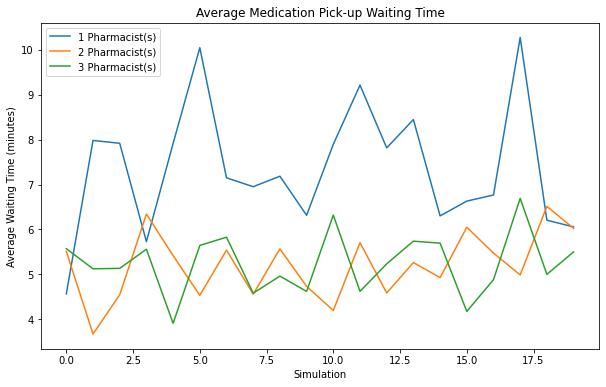

In [48]:
class Pharmacy:
    def __init__(self, env, num_pharmacists):
        self.env = env
        self.pharmacists = simpy.Resource(env, num_pharmacists)
        self.waiting_times = []

    def pick_up_medication(self, customer):
        yield self.env.timeout(random.uniform(0, 10))  # Time to fill the medication

    def record_waiting_time(self, start_time):
        waiting_time = self.env.now - start_time
        self.waiting_times.append(waiting_time)

def customer(env, pharmacy):
    arrival_time = env.now
    with pharmacy.pharmacists.request() as request:
        yield request
        yield env.process(pharmacy.pick_up_medication(customer))
        waiting_time = env.now - arrival_time
        pharmacy.record_waiting_time(arrival_time)

def generate_customers(env, num_customers, pharmacy):
    for i in range(num_customers):
        env.process(customer(env, pharmacy))
        yield env.timeout(random.expovariate(1/10))  # Inter-arrival time, assuming an average of 10 minutes

def run_simulation(env, num_customers, num_pharmacists, num_simulations):
    waiting_times_avg = []
    for _ in range(num_simulations):
        pharmacy = Pharmacy(env, num_pharmacists)
        env.process(generate_customers(env, num_customers, pharmacy))
        env.run()
        waiting_times_avg.append(statistics.mean(pharmacy.waiting_times))
    return waiting_times_avg

# Parameters for simulation
num_customers = 30
num_simulations = 20
num_pharmacists_list = [1, 2, 3]

# Simulate the system and collect waiting times for each number of pharmacists
results = {}
for num_pharmacists in num_pharmacists_list:
    print(f"\nSimulating with {num_pharmacists} pharmacist(s):")
    env = simpy.Environment()
    waiting_times_avg = run_simulation(env, num_customers, num_pharmacists, num_simulations)
    results[num_pharmacists] = waiting_times_avg

# Plotting the average waiting times
plt.figure(figsize=(10, 6))
for num_pharmacists, waiting_times_avg in results.items():
    plt.plot(waiting_times_avg, label=f"{num_pharmacists} Pharmacist(s)")
plt.xlabel("Simulation")
plt.ylabel("Average Waiting Time (minutes)")
plt.title("Average Medication Pick-up Waiting Time")
plt.legend()
plt.show()



Simulating with 1 pharmacist(s):

Simulating with 2 pharmacist(s):

Simulating with 3 pharmacist(s):


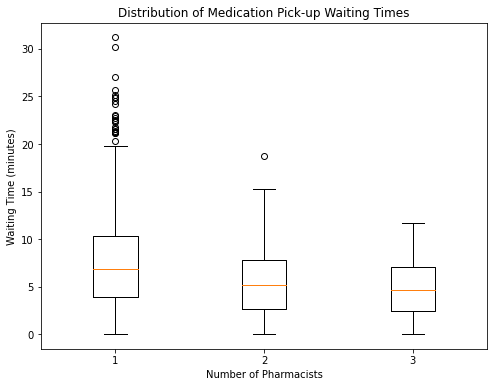

In [53]:
import simpy
import random
import matplotlib.pyplot as plt
import statistics

class Pharmacy:
    def __init__(self, env, num_pharmacists):
        self.env = env
        self.pharmacists = simpy.Resource(env, num_pharmacists)
        self.waiting_times = []

    def pick_up_medication(self, customer):
        yield self.env.timeout(random.uniform(0, 10))  # Time to fill the medication

    def record_waiting_time(self, start_time):
        waiting_time = self.env.now - start_time
        self.waiting_times.append(waiting_time)

def customer(env, pharmacy):
    arrival_time = env.now
    with pharmacy.pharmacists.request() as request:
        yield request
        yield env.process(pharmacy.pick_up_medication(customer))
        waiting_time = env.now - arrival_time
        pharmacy.record_waiting_time(arrival_time)

def generate_customers(env, num_customers, pharmacy):
    for i in range(num_customers):
        env.process(customer(env, pharmacy))
        yield env.timeout(random.expovariate(1/10))  # Inter-arrival time, assuming an average of 10 minutes

def run_simulation(env, num_customers, num_pharmacists, num_simulations):
    waiting_times = []
    for _ in range(num_simulations):
        pharmacy = Pharmacy(env, num_pharmacists)
        env.process(generate_customers(env, num_customers, pharmacy))
        env.run()
        waiting_times.extend(pharmacy.waiting_times)
    return waiting_times

# Parameters for simulation
num_customers = 30
num_simulations = 20
num_pharmacists_list = [1, 2, 3]

# Simulate the system and collect waiting times for each number of pharmacists
results = {}
for num_pharmacists in num_pharmacists_list:
    print(f"\nSimulating with {num_pharmacists} pharmacist(s):")
    env = simpy.Environment()
    waiting_times = run_simulation(env, num_customers, num_pharmacists, num_simulations)
    results[num_pharmacists] = waiting_times

# Create a box plot to visualize the distribution of waiting times for each number of pharmacists
plt.figure(figsize=(8, 6))
boxplot_data = [results[num_pharmacists] for num_pharmacists in num_pharmacists_list]
plt.boxplot(boxplot_data, labels=num_pharmacists_list)
plt.xlabel("Number of Pharmacists")
plt.ylabel("Waiting Time (minutes)")
plt.title("Distribution of Medication Pick-up Waiting Times")
plt.show()



Simulating with 1 pharmacist(s):

Simulating with 2 pharmacist(s):

Simulating with 3 pharmacist(s):


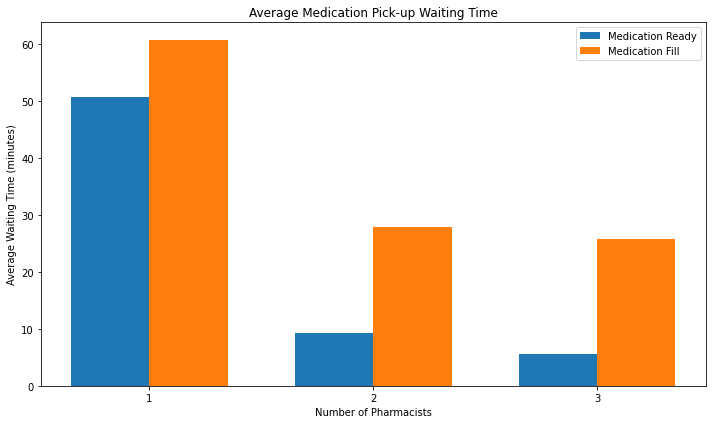

In [52]:
import simpy
import random
import matplotlib.pyplot as plt
import statistics

class Pharmacy:
    def __init__(self, env, num_pharmacists):
        self.env = env
        self.pharmacists = simpy.Resource(env, num_pharmacists)
        self.waiting_times_ready = []
        self.waiting_times_fill = []

    def pick_up_medication(self, customer):
        if customer.ready:
            yield self.env.timeout(random.uniform(0, 10))  # Time to fill the medication
        else:
            yield self.env.timeout(random.uniform(20, 30))  # Longer time to fill the medication

    def record_waiting_time(self, start_time, ready):
        waiting_time = self.env.now - start_time
        if ready:
            self.waiting_times_ready.append(waiting_time)
        else:
            self.waiting_times_fill.append(waiting_time)

class Customer:
    def __init__(self, env, pharmacy):
        self.env = env
        self.pharmacy = pharmacy
        self.ready = random.random() < 0.7  # 70% chance that medication is ready

    def process(self):
        arrival_time = self.env.now
        with self.pharmacy.pharmacists.request() as request:
            yield request
            yield self.env.process(self.pharmacy.pick_up_medication(self))
            self.pharmacy.record_waiting_time(arrival_time, self.ready)

def generate_customers(env, num_customers, pharmacy):
    for i in range(num_customers):
        customer = Customer(env, pharmacy)
        env.process(customer.process())
        yield env.timeout(random.expovariate(1/10))  # Inter-arrival time, assuming an average of 10 minutes

def run_simulation(env, num_customers, num_pharmacists, num_simulations):
    waiting_times_ready_avg = []
    waiting_times_fill_avg = []
    for _ in range(num_simulations):
        pharmacy = Pharmacy(env, num_pharmacists)
        env.process(generate_customers(env, num_customers, pharmacy))
        env.run()
        waiting_times_ready_avg.append(statistics.mean(pharmacy.waiting_times_ready))
        waiting_times_fill_avg.append(statistics.mean(pharmacy.waiting_times_fill))
    return waiting_times_ready_avg, waiting_times_fill_avg

# Parameters for simulation
num_customers = 30
num_simulations = 20
num_pharmacists_list = [1, 2, 3]

# Simulate the system and collect average waiting times for each number of pharmacists
results_ready = {}
results_fill = {}
for num_pharmacists in num_pharmacists_list:
    print(f"\nSimulating with {num_pharmacists} pharmacist(s):")
    env = simpy.Environment()
    waiting_times_ready, waiting_times_fill = run_simulation(env, num_customers, num_pharmacists, num_simulations)
    results_ready[num_pharmacists] = waiting_times_ready
    results_fill[num_pharmacists] = waiting_times_fill

# Visualizing the average waiting times for customers
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = [i for i in range(len(num_pharmacists_list))]

bar1 = ax.bar(index, [statistics.mean(results_ready[num_pharmacists]) for num_pharmacists in num_pharmacists_list], bar_width, label='Medication Ready')
bar2 = ax.bar([i + bar_width for i in index], [statistics.mean(results_fill[num_pharmacists]) for num_pharmacists in num_pharmacists_list], bar_width, label='Medication Fill')

ax.set_xlabel('Number of Pharmacists')
ax.set_ylabel('Average Waiting Time (minutes)')
ax.set_title('Average Medication Pick-up Waiting Time')
ax.set_xticks([i + bar_width/2 for i in index])
ax.set_xticklabels(num_pharmacists_list)
ax.legend()

plt.tight_layout()
plt.show()


**Conclusion**
- The model simulated the wait time for 30 customers who arrive to the pharmacy to collect their medication. The model created adds in variables for one to three staff working and for customers' medication status: ready or needs to be filled, requiring more wait time. 
- The result of the model shows two predictions (1) wait time is longer when medication is not ready, and 
- (2) there is a significant decrease in wait time from one staff working to two staff working; when there were 3 pharmacists are on shift the average wait time is about the same as two staff members. Additionally, if we look beyond the average wait time and break down the wait time for meds ready or needing to be filled, the same pattern is present. 

- 